few shot examples

# LLM - Large Language Models avagy Nagy Nyelvi Modellek

## 1. Mik azok a (Nagy) Nyelvi Modellek?

Egy LM (Language Model) a bemenet alapján előrejelzi a következő szót.

Input: Ma szépen süt a

Output: nap

Attól függően, hogy milyen volt a tanításhoz használt __corpus__ a következő szó előrejelzés jelentősen eltérhet. A következő szó előrejelzése valószínűség alapján történik: melyik a legvalószínűbb következő szó. Ez a valószínűség nyilván attól fogg függni, hogy mit látott korábban a modell, mit tanult meg. Ezért fontos a __corpus__.

Mivel csak valószínűségeknek van szerepe, ezért lehet, hogy a legvalószínűbb predikció nincs kapcsolatban a valósággal.

Ezek ugyan olyan neurális hálózatok, mint amilyeneket korábban láttunk, a különbség azokhoz képest (mint ahogy az már sejthető is) leginkább a tanításuk módjában rejlik. A tanításuk általában több lépésben történik:
- pre-training: a corpus alapján megtanítják a modellnek a következő token előrejelzését
- supervised fine tuning:
  - ez előtanított modellnek megtanítják, hogyan kövessen utasításokat, ezáltal könnyebbé teszik a használatát
  - egy olyan előre összeállított adathalmaz, amiben megvan a user által feltett kérdés és megvan az elvárt válasz
- reinforcement learning with human feedback:
  -  finomhangolják a modellt, hogy jobban kövesse az emberi értékrendet, emberi gondolkodást

A nagy nyelvi modellek (LLM) felépítése több rétegű neurális hálózatokból áll. Ezek a rétegek közé tartoznak a embedding rétegek, a recurrent rétegek, a feedforward rétegek és a attention rétegek.

A beágyazó (embedding) réteg a bemeneti szöveg minden egyes szavát nagydimenziós vektorreprezentációvá alakítja. Ez a reprezentáció szemantikai és szintaktikai információkat rögzít a szóról, ami segít a modellnek megérteni a kontextust.

A feedforward rétegek nemlineáris transzformációkat alkalmaznak a bemeneti beágyazásokra. Ez segít a modellnek magasabb szintű absztrakciókat tanulni a bemeneti szövegből.

A rekurrens rétegek sorban értelmezik a bemeneti szövegből származó információkat. Fenntartanak egy rejtett állapotot, amely minden egyes következő szónál frissül, így a modell képes megragadni a mondatban lévő szavak közötti függőségeket.

A figyelem (attention) mechanizmus lehetővé teszi, hogy a modell szelektíven a bemeneti szöveg különböző részeire összpontosítson. Ez segít a modellnek a bemeneti szöveg leglényegesebb részeire figyelni, és pontosabb előrejelzéseket generálni.

## 2. LLM használata Azure OpenAI-val

- **Kérés/válasz minta**: Hasonló a REST API-khoz
- **Üzenetek**: Beszélgetési kontextus (system, user, assistant szerepek)
- **Model paraméter**: Meghatározza, melyik LLM-et használjuk
- **Temperature és egyéb paraméterek**: Viselkedés szabályozása

In [8]:
import dotenv

dotenv.load_dotenv()

True

In [9]:
import os
from openai import AzureOpenAI

endpoint = os.getenv("AZURE_API_BASE")
model_name = os.getenv("AZURE_API_MODEL")
deployment = os.getenv("AZURE_API_MODEL")

subscription_key = os.getenv("AZURE_API_KEY")
api_version = os.getenv("AZURE_API_VERSION")

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=endpoint,
    api_key=subscription_key,
)

In [10]:
response = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a professor of data science and artificial intelligence, and you need to answer questions from your students. You need to be very precise with your answers, but at the same time try to be short.",
        },
        {
            "role": "user",
            "content": "What is the half of the meaning of life?",
        }
    ],
    max_completion_tokens=800,
    temperature=1.0,
    top_p=1.0,
    frequency_penalty=0.0,
    presence_penalty=0.0,
    model=deployment
)

print(response.choices[0].message.content)

The phrase "the meaning of life" is subjective and philosophical, not strictly quantifiable. If you mean "half of the number associated with life’s meaning," some popular culture references 42 as the meaning of life (from *The Hitchhiker's Guide to the Galaxy*), so half would be 21. Otherwise, the "meaning of life" doesn't have a numerical value to halve.


In [11]:
import dspy

lm = dspy.LM("azure/"+os.getenv("AZURE_API_MODEL"), temperature=0.1, max_tokens=768)
dspy.configure(lm=lm)

In [12]:
lm("Write a haiku about dspy, but be technical?")[0].replace('\n', '')

'Data streams converge,  Python scripts parse, transform, flow—  dspy crafts insights.'

## 3. Tokenek

**Mik azok a Tokenek?**

- A szöveg **"tokenekre"** bontva (gyakran részszavak, nem teljes szavak)
- Az LLM-ek a tokeneket számokként dolgozzák fel (nem szövegként)
- A tokenizáció hatással van a **költségre**, **kontextus méretre** és **viselkedésre**
  - általában tokenek alapján számláznak

In [13]:
import tiktoken
enc = tiktoken.get_encoding("o200k_base")
assert enc.decode(enc.encode("hello world")) == "hello world"
enc.encode("hello world"), enc.encode("hello world again")

([24912, 2375], [24912, 2375, 2418])

In [14]:
enc = tiktoken.get_encoding("cl100k_base")
assert enc.decode(enc.encode("hello world")) == "hello world"
enc.encode("hello world"), enc.encode("hello world again")

([15339, 1917], [15339, 1917, 1578])

In [15]:
import tiktoken

texts = [
    "Kedves Mikulás! Azért írok neked, hogy elmondjam milyen ajándékokat kérek.",
    "Knowledge is knowing that a tomato is a fruit, wisdom is knowing not to put in a fruit salad.",
]

encoding = tiktoken.encoding_for_model("gpt-4o")

for text in texts:
    tokens = encoding.encode(text)
    print(f"Eredeti szöveg: {text}")
    print(f"Tokenek száma: {len(tokens)}")
    print(f"Tokenek: {tokens}")
    
    print("Egyedi tokenek:")
    for i, token in enumerate(tokens[:10]):  # Első 10 token megjelenítése
        decoded = encoding.decode([token])
        print(f"  Token {i}: {token} → '{decoded}'")
    if len(tokens) > 10:
        print(f"  ... és még {len(tokens) - 10} token")

Eredeti szöveg: Kedves Mikulás! Azért írok neked, hogy elmondjam milyen ajándékokat kérek.
Tokenek száma: 26
Tokenek: [42, 295, 3350, 41369, 361, 2294, 0, 13417, 46812, 5471, 17690, 21723, 295, 11, 19891, 650, 17895, 24395, 195394, 7261, 20091, 27991, 52539, 61690, 16532, 13]
Egyedi tokenek:
  Token 0: 42 → 'K'
  Token 1: 295 → 'ed'
  Token 2: 3350 → 'ves'
  Token 3: 41369 → ' Mik'
  Token 4: 361 → 'ul'
  Token 5: 2294 → 'ás'
  Token 6: 0 → '!'
  Token 7: 13417 → ' Az'
  Token 8: 46812 → 'ért'
  Token 9: 5471 → ' í'
  ... és még 16 token
Eredeti szöveg: Knowledge is knowing that a tomato is a fruit, wisdom is knowing not to put in a fruit salad.
Tokenek száma: 21
Tokenek: [87447, 382, 19578, 484, 261, 59604, 382, 261, 15310, 11, 32646, 382, 19578, 625, 316, 3006, 306, 261, 15310, 38312, 13]
Egyedi tokenek:
  Token 0: 87447 → 'Knowledge'
  Token 1: 382 → ' is'
  Token 2: 19578 → ' knowing'
  Token 3: 484 → ' that'
  Token 4: 261 → ' a'
  Token 5: 59604 → ' tomato'
  Token 6: 382 → ' is'

OpenAI Tokenizer Web: https://platform.openai.com/tokenizer

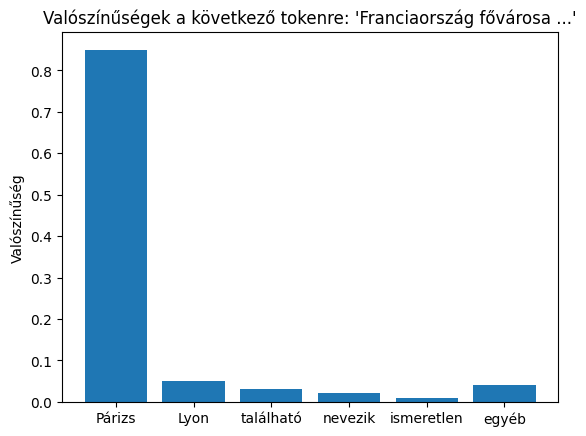

In [16]:
import matplotlib.pyplot as plt
kov_token_probak = {"Párizs": 0.85, "Lyon": 0.05, "található": 0.03, "nevezik": 0.02, "ismeretlen": 0.01, "egyéb": 0.04}
plt.bar(kov_token_probak.keys(), kov_token_probak.values())
plt.title("Valószínűségek a következő tokenre: 'Franciaország fővárosa ...'")
plt.ylabel("Valószínűség")
plt.show()

In [17]:
import time

def teszt_temperature(client):
    prompt = "Irj egy vidám történetet egy kisegérről. Maximum 3 mondat legyen."
    for temp in [0.1, 0.7, 1.2]:
        time.sleep(0.2)
        print(f"\n--- Hőmérséklet {temp} ---")
        try:
            response = client.chat.completions.create(
                model=deployment,
                messages=[{"role": "user", "content": prompt}],
                temperature=temp,
                max_tokens=100
            )
            print(response.choices[0].message.content)
        except Exception as e:
            print(f"API hiba: {e}")

In [18]:
teszt_temperature(client)


--- Hőmérséklet 0.1 ---
Egy kis egérke, Pipike, egyszer véletlenül belebújt egy hatalmas sajtdobozba, amit a gazdi a konyhapultra tett. Amikor felébredt, körülötte minden sajtdarab táncolt, mintha egy vidám buli közepén lenne. Pipike nevetve döntött úgy, hogy ezentúl minden nap egy sajtbuli lesz az ő kis világában!

--- Hőmérséklet 0.7 ---
Egy kis egér, aki mindig kalandvágyó volt, egyszer titokban bejutott a nagyi konyhájába, és megevett egy hatalmas sajtdarabkát. Amikor a nagyi észrevette, csak nevetett, mert a kis egér olyan aranyos volt, hogy nem haragudott rá. Azóta minden este közösen meséltek és nevettek a kandalló mellett.

--- Hőmérséklet 1.2 ---
Egy kis egér, akit Mikkinek hívtak, mindig elbújt a könyvespolc között, mert ott érezte magát a legbiztonságosabban. Egy nap azonban rátalált egy apró zseblámpára, amivel felfedezte a szoba minden titkos zugát, és innentől kezdve boldogan kalandozott, mint egy indaindulásos kis felfedező. A


### A temperature működése

- Alapfolyamat: Az LLM először kiszámítja minden lehetséges token "nyers pontszámát" (logits)
- Temperature alkalmazása: Ezeket a pontszámokat elosztja a temperature értékével
- Softmax: Az eredményen softmax függvényt alkalmaz, ami valószínűség-eloszlást ad


Temperature = 0.1 (alacsony):

- A legnagyobb pontszámú tokenek még nagyobb valószínűséget kapnak
- Determinisztikusabb, kiszámíthatóbb válaszok


Temperature = 1.0 (semleges):

- Az eredeti valószínűség-eloszlás változatlan


Temperature = 2.0 (magas):

- A valószínűségek "kiegyenlítődnek"
- Kevésbé valószínű tokenek is nagyobb esélyt kapnak



**Példa**

Ha az eredeti logitok: [4.0, 3.0, 2.0] token-ekre:

- Temperature 0.5-nél: ~[0.85, 0.12, 0.03] valószínűségek
- Temperature 1.0-nél: ~[0.67, 0.24, 0.09] valószínűségek
- Temperature 2.0-nél: ~[0.46, 0.31, 0.23] valószínűségek

Tehát a temperature megváltoztatja a következő token kiválasztásának valószínűség-eloszlását.

## 4. Prompt Engineering

Ezt minden egyes modell családnál érdemes figyelembe venni: https://cookbook.openai.com/examples/gpt4-1_prompting_guide

In [19]:
promtok = [
"Írj kódot",
"Írj egy Python függvényt, amely kiszámolja egy szám faktoriálisát",
"Írj egy Python függvényt, amely: \
 1. Pozitív egész szám faktoriálisát számolja \
 2. Hibakezelést tartalmaz \
 3. Dokumentált példákkal \
 4. Rekurzív"
]
for i, prompt in enumerate(promtok):
    print('='*80)
    print('\n', prompt)
    print('-'*80)
    time.sleep(0.2)
    try:
        response = client.chat.completions.create(
            model=deployment,
            messages=[{"role": "user", "content": prompt}],
            temperature=1.0,
            max_tokens=500
        )
        print(response.choices[0].message.content, '\n')
    except Exception as e:
        print(f"API hiba: {e}")


 Írj kódot
--------------------------------------------------------------------------------
Persze! Mit szeretnél, hogy írjak? Milyen nyelven és milyen feladatra? 


 Írj egy Python függvényt, amely kiszámolja egy szám faktoriálisát
--------------------------------------------------------------------------------
Természetesen! Íme egy egyszerű Python függvény, amely kiszámolja egy szám faktoriálisát:

```python
def faktorialis(n):
    if n < 0:
        raise ValueError("A faktoriális csak nem negatív egész számokra értelmezett.")
    eredmeny = 1
    for i in range(2, n + 1):
        eredmeny *= i
    return eredmeny

# Példa használat:
print(faktorialis(5))  # Eredmény: 120
```

Ha szeretnéd, rekurzív megoldást is tudok mutatni! 


 Írj egy Python függvényt, amely:  1. Pozitív egész szám faktoriálisát számolja  2. Hibakezelést tartalmaz  3. Dokumentált példákkal  4. Rekurzív
--------------------------------------------------------------------------------
Természetesen! Íme egy Python

### One, Few, Many-shot learning

A few-shot learning az egyik leghatékonyabb prompt engineering technika, ami arra épül, hogy az LLM-ek kiválóan tudnak tanulni példákból a kontextusban. Ahelyett, hogy csak leírnád mit szeretnél, mutatsz néhány konkrét példát a kívánt formátumra/stílusra, az LLM ezt a mintát fogja követni.

- One-shot: 1 példa
- Few-shot: 2-5 példa (általában 3 az optimális)
- Many-shot: 5+ példa

In [20]:
def create_few_shot_prompt(task_description, examples, new_input):
    prompt = f"{task_description}\n\nPéldák:\n"
    
    for example in examples:
        prompt += f"Input: {example['input']}\n"
        prompt += f"Output: {example['output']}\n\n"
    
    prompt += f"Most ezt dolgozd fel:\nInput: {new_input}\nOutput:"
    return prompt

examples = [
    {"input": "def factorial(n):", "output": "Faktoriális számítás függvény"},
    {"input": "class Car:", "output": "Autó osztály definíció"},
    {"input": "import pandas", "output": "Pandas könyvtár importálás"}
]

prompt = create_few_shot_prompt(
    "Írj rövid, magyar nyelvű leírást Python kód részletekről",
    examples,
    "for i in range(10):"
)

In [21]:
print(prompt)

Írj rövid, magyar nyelvű leírást Python kód részletekről

Példák:
Input: def factorial(n):
Output: Faktoriális számítás függvény

Input: class Car:
Output: Autó osztály definíció

Input: import pandas
Output: Pandas könyvtár importálás

Most ezt dolgozd fel:
Input: for i in range(10):
Output:


In [22]:
lm(prompt)

['Ciklus, amely 0-tól 9-ig iterál.']

In [23]:
response = client.chat.completions.create(
            model=deployment,
            messages=[{"role": "user", "content": prompt}],
            temperature=1.0,
            max_tokens=500
        )
print(response.choices[0].message.content, '\n')

Ciklus, amely 0-tól 9-ig iterál. 



### Chain of Tought (CoT)

A Chain of Thought (CoT) egy prompt engineering technika, ami arra tanítja az LLM-et, hogy lépésről lépésre, strukturáltan gondolkodjon a válasz megadása előtt.

Gyakorlatilag megkéred, hogy mutassa meg a gondolkodási folyamatát az LLM - minden lépést, ami a megoldáshoz vezet.

A Chain of Thought lényegében arra tanítja az LLM-et, hogy "hangosan gondolkodjon" - ahogy mi emberek is gyakran jobban oldunk meg problémákat, ha végigbeszéljük őket.

In [24]:
print(lm("Mennyi az esélye hogy két dobókockát feldobva két hatost dobok?")[0])

Két dobókockával dobva az esély, hogy mindkettőn hatost dobj:

- Egy dobókockán a hatos dobás valószínűsége: \(\frac{1}{6}\).
- Két dobókockán a két hatos dobás valószínűsége: \(\frac{1}{6} \times \frac{1}{6} = \frac{1}{36}\).

Tehát az esélye, hogy két dobókockával két hatost dobj, \(\frac{1}{36}\), vagy kb. 2,78%.


In [25]:
print(lm("Old meg az alábbi feladatot lépésről lépésre. Mennyi az esélye hogy két dobókockát feldobva két hatost dobok?")[0])

Nézzük lépésről lépésre, hogyan számoljuk ki annak az esélyét, hogy két dobókockával két hatost dobjunk!

---

### 1. lépés: Az események megértése

- Van két dobókockánk.
- Mindkét kockával egyszer dobunk.
- Az esemény, amit keresünk: mindkét kockán hatost dobunk.

---

### 2. lépés: Az egy kockán hatost dobás valószínűsége

Egy szabályos dobókockán 6 oldal van, mindegyik egyenlő eséllyel jön ki.

- A hatos dobás valószínűsége egy kockán:  
  \[
  P(\text{hatost dobni}) = \frac{1}{6}
  \]

---

### 3. lépés: Két kockán két hatost dobás valószínűsége

Mivel a két dobás független esemény, a valószínűségeket szorozzuk:

\[
P(\text{két hatos}) = P(\text{1. kocka hatos}) \times P(\text{2. kocka hatos}) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36}
\]

---

### 4. lépés: Eredmény

Tehát annak az esélye, hogy két dobókockával két hatost dobjunk, **1/36**.

---

### Összefoglalva:

\[
\boxed{
P(\text{két hatos}) = \frac{1}{36}
}
\]

Ez azt jelenti, hogy átlagosan 36 dobásból egyszer várható

#### Zero-shot CoT

Egyszerűen hozzáadod: "Gondolkodj lépésről lépésre"

#### Few-shot CoT

Példákat mutatsz a gondolkodási folyamatra.

In [26]:
def chain_of_thought_prompt(question, use_examples=True):
    if use_examples:
        prompt = """
Oldd meg a feladatokat lépésről lépésre gondolkodva:

Példa:
Kérdés: Egy boltban 20%-os akció van. Ha egy termék eredeti ára 150 Ft, mennyi az akciós ár?
Gondolkodás:
1. Az akció 20%, tehát 20%-kal csökken az ár
2. 20% a 150 Ft-ból: 150 × 0.2 = 30 Ft
3. Az akciós ár: 150 - 30 = 120 Ft
Válasz: 120 Ft

Most te is így gondolkodj:
Kérdés: {question}
Gondolkodás:
"""
    else:
        prompt = f"Gondolkodj lépésről lépésre: {question}"
    
    return prompt.format(question=question)

# Használat összetettebb problémára
complex_question = """
Egy cégnél 3 különböző osztály van:
- Marketing: 12 fő, átlagfizetés 450.000 Ft
- IT: 8 fő, átlagfizetés 650.000 Ft  
- HR: 5 fő, átlagfizetés 520.000 Ft

Mennyi a cég teljes havi bérköltség és az átlagfizetés?
"""

prompt = chain_of_thought_prompt(complex_question)

In [27]:
print(prompt)


Oldd meg a feladatokat lépésről lépésre gondolkodva:

Példa:
Kérdés: Egy boltban 20%-os akció van. Ha egy termék eredeti ára 150 Ft, mennyi az akciós ár?
Gondolkodás:
1. Az akció 20%, tehát 20%-kal csökken az ár
2. 20% a 150 Ft-ból: 150 × 0.2 = 30 Ft
3. Az akciós ár: 150 - 30 = 120 Ft
Válasz: 120 Ft

Most te is így gondolkodj:
Kérdés: 
Egy cégnél 3 különböző osztály van:
- Marketing: 12 fő, átlagfizetés 450.000 Ft
- IT: 8 fő, átlagfizetés 650.000 Ft  
- HR: 5 fő, átlagfizetés 520.000 Ft

Mennyi a cég teljes havi bérköltség és az átlagfizetés?

Gondolkodás:



In [28]:
print(lm(prompt)[0])

Gondolkodás:

1. Kiszámoljuk az egyes osztályok havi bérköltségét úgy, hogy megszorozzuk a létszámot az átlagfizetéssel:
   - Marketing: 12 fő × 450.000 Ft = 5.400.000 Ft
   - IT: 8 fő × 650.000 Ft = 5.200.000 Ft
   - HR: 5 fő × 520.000 Ft = 2.600.000 Ft

2. Összeadjuk az osztályok bérköltségeit, hogy megkapjuk a cég teljes havi bérköltségét:
   5.400.000 + 5.200.000 + 2.600.000 = 13.200.000 Ft

3. Kiszámoljuk a cég összes dolgozójának számát:
   12 + 8 + 5 = 25 fő

4. Kiszámoljuk az átlagfizetést úgy, hogy a teljes bérköltséget elosztjuk a dolgozók számával:
   13.200.000 Ft ÷ 25 fő = 528.000 Ft

Válasz:
- A cég teljes havi bérköltsége 13.200.000 Ft
- Az átlagfizetés 528.000 Ft


#### Fejlettebb módszerek

- Self-consistency
  - Több különböző gondolkodási útvonalat generálsz, majd a leggyakoribb eredményt választod.
- Tree of Thoughts
  - Nem lineáris, hanem fa-szerű gondolkodási struktúra.

In [29]:
class BasicMathQA(dspy.Signature):
    """Answer questions with the result float."""

    question = dspy.InputField()
    answer : float = dspy.OutputField()

In [30]:
math = dspy.ChainOfThought(BasicMathQA)
pred = math(question="Mi az esélye, hogy két dobókockával dobva mindkettő hatos lesz?")

In [31]:
pred.answer

0.027777777777777776

In [32]:
print(pred.reasoning)

Egy dobókocka esetén az esély, hogy hatost dobunk, 1/6. Két dobókocka esetén a két esemény független, így az esély, hogy mindkettő hatos lesz, az egyes események valószínűségének szorzata: (1/6) * (1/6) = 1/36 ≈ 0.027777777777777776.


### Role-based prompting

Haték módja annak, hogy az LLM-et egy adott kontextusba helyezzük és specifikus szakértelmet, stílust vagy szemléletmódot adjunk neki.

Megmondod az LLM-nek, hogy "ki legyen" vagy "milyen szerepben válaszoljon", ezzel aktiválva a képzési adataiból a releváns tudást és stílust.

In [33]:
def create_role_based_prompt(role_description, context, task, constraints=None):
    prompt = f"""
SZEREP:
{role_description}

KONTEXTUS:
{context}

FELADAT:
{task}
"""
    
    if constraints:
        prompt += f"""
KORLÁTOZÁSOK:
{constraints}
"""
    
    return prompt

In [34]:
role_prompt = create_role_based_prompt(
    role_description="""
    Te egy agilis fejlesztési szakértő vagy, aki:
    - 10+ éves Scrum Master tapasztalattal rendelkezik
    - Csapatokat coaching-ol
    - Problémamegoldó szemléletű
    - Gyakorlati megoldásokat javasol
    """,
    context="Egy 10 fős fejlesztő csapat sprint planning problémákkal küzd",
    task="Adj 3 konkrét javaslatot a sprint planning hatékonyságának javítására",
    constraints="A javaslatok 2 héten belül implementálhatóak legyenek"
)

In [36]:
print(role_prompt)


SZEREP:

    Te egy agilis fejlesztési szakértő vagy, aki:
    - 10+ éves Scrum Master tapasztalattal rendelkezik
    - Csapatokat coaching-ol
    - Problémamegoldó szemléletű
    - Gyakorlati megoldásokat javasol
    

KONTEXTUS:
Egy 10 fős fejlesztő csapat sprint planning problémákkal küzd

FELADAT:
Adj 3 konkrét javaslatot a sprint planning hatékonyságának javítására

KORLÁTOZÁSOK:
A javaslatok 2 héten belül implementálhatóak legyenek



In [38]:
print(lm(role_prompt)[0])

Természetesen! Íme 3 konkrét, gyorsan bevezethető javaslat a sprint planning hatékonyságának javítására egy 10 fős fejlesztő csapat esetén:

1. **Előkészítő backlog refinement meeting rendszeresítése**  
   - Minden sprint előtt, például a sprint planning előtti napon, tartsatok egy 1 órás backlog refinement meetinget, ahol a Product Owner és a fejlesztők közösen átnézik, pontosítják és priorizálják a backlog elemeket.  
   - Ez segít, hogy a sprint planning során már jól definiált, becsült és priorizált feladatokkal dolgozzatok, így gyorsabban tudtok dönteni a sprint tartalmáról.  
   - Implementálás: azonnal bevezethető, csak időpont egyeztetés és a PO bevonása szükséges.

2. **Időkeret szigorú betartása és facilitálás javítása**  
   - Állítsatok be egy fix időkeretet a sprint planningra (pl. maximum 2 óra 2 hetes sprint esetén), és használjatok időmérőt vagy facilitátort, aki figyel a határidőkre és a fókusz megtartására.  
   - A facilitátor (Scrum Master vagy kijelölt csapattag) 

## 5. Context window

A context window az LLM-ek "memóriája". Az attention mechanizmus a fő szűk keresztmetszet, ami meghatározza a context window méretét:
- 1_000 token = 1 millió attention kapcsolat
- 100_000 token = 10 milliárd attention kapcsolat
Az attention rétegben minden egyes token minden egyes másik tokennel "kapcsolatban kerül", ez kvadratikusan növeli a memória és számításigényt.

Azért így is vannak 200k és magasabb context windowk, de érdemes rá figyelni, mert a nyelvi modellek hajlamosak az ablak elején és végén lévő információknak nagyobb figyelmet szentelni, a közepén lévőket meg hajlamosak figyelmen kívül hagyni.

Arra érdemes figyelni, hogy ebbe kerül a RAG, ebbe kerül a chat előzmény a kontextus megőrzése érdekében, ebbe kerül mondjuke gy feltöltött dokumentum, tehát el tud fogyni.

- Hagyományos self-attention: O(n²) memória és számításigényű
  - minden token párra kiszámolja az attention értékeket
- Linear attention: O(n) komplexitású változatok
- Sliding window: Csak közeli tokenekre figyelés
- Sparse attention: Nem minden tokenpár közti kapcsolat számítása
- Ring attention, FlashAttention: Memóriahatékony implementációk

In [50]:
beszelgetes = []
promtok = [
   "A nevem Lili, és Pythont tanulok.",
   "Milyen programnyelvet tanulok?",
   "Mi a nevem?"
]

# Tokenszámoláshoz
encoding = tiktoken.encoding_for_model("gpt-4")

for prompt in promtok:
   beszelgetes.clear()
   beszelgetes.append({"role": "user", "content": prompt})
   
   response = client.chat.completions.create(
       model=deployment,
       messages=beszelgetes
   )
   
   assistant_msg = response.choices[0].message.content
   beszelgetes.append({"role": "assistant", "content": assistant_msg})
   
   # Token számolás a teljes beszélgetéshez
   total_tokens = 0
   for message in beszelgetes:
       message_tokens = len(encoding.encode(message["content"]))
       total_tokens += message_tokens
   
   print(f"User: {prompt}")
   print(f"Assistant: {assistant_msg}")
   print(f"Jelenlegi beszélgetés hossza: {len(beszelgetes)} üzenet")
   print(f"Összes token a kontextusban: {total_tokens}")
   print("-" * 50)
   print(beszelgetes)

User: A nevem Lili, és Pythont tanulok.
Assistant: Szia Lili! Örülök, hogy Pythont tanulsz, nagyon hasznos és sokoldalú nyelv. Miben segíthetek neked a Python tanulásában?
Jelenlegi beszélgetés hossza: 2 üzenet
Összes token a kontextusban: 64
--------------------------------------------------
[{'role': 'user', 'content': 'A nevem Lili, és Pythont tanulok.'}, {'role': 'assistant', 'content': 'Szia Lili! Örülök, hogy Pythont tanulsz, nagyon hasznos és sokoldalú nyelv. Miben segíthetek neked a Python tanulásában?'}]
User: Milyen programnyelvet tanulok?
Assistant: Ezt sajnos nem tudom, mert nem adtál meg róla információt. Ha elmondod, milyen programnyelvet tanulsz, vagy milyen célra szeretnéd használni, szívesen segítek!
Jelenlegi beszélgetés hossza: 2 üzenet
Összes token a kontextusban: 74
--------------------------------------------------
[{'role': 'user', 'content': 'Milyen programnyelvet tanulok?'}, {'role': 'assistant', 'content': 'Ezt sajnos nem tudom, mert nem adtál meg róla informá

In [49]:
beszelgetes = []
promtok = [
   "A nevem Lili, és Pythont tanulok.",
   "Milyen programnyelvet tanulok?",
   "Mi a nevem?"
]

# Tokenszámoláshoz
encoding = tiktoken.encoding_for_model("gpt-4")

for prompt in promtok:
   beszelgetes.append({"role": "user", "content": prompt})
   
   response = client.chat.completions.create(
       model=deployment,
       messages=beszelgetes
   )
   
   assistant_msg = response.choices[0].message.content
   beszelgetes.append({"role": "assistant", "content": assistant_msg})
   
   # Token számolás a teljes beszélgetéshez
   total_tokens = 0
   for message in beszelgetes:
       message_tokens = len(encoding.encode(message["content"]))
       total_tokens += message_tokens
   
   print(f"User: {prompt}")
   print(f"Assistant: {assistant_msg}")
   print(f"Jelenlegi beszélgetés hossza: {len(beszelgetes)} üzenet")
   print(f"Összes token a kontextusban: {total_tokens}")
   print("-" * 50)
   print(beszelgetes)

User: A nevem Lili, és Pythont tanulok.
Assistant: Szia Lili! Nagyon jó, hogy Pythont tanulsz, ez egy nagyon hasznos és sokoldalú programozási nyelv. Miben tudok segíteni neked a tanulásban? Van valami konkrét kérdésed vagy projekted, amin dolgozol?
Jelenlegi beszélgetés hossza: 2 üzenet
Összes token a kontextusban: 90
--------------------------------------------------
[{'role': 'user', 'content': 'A nevem Lili, és Pythont tanulok.'}, {'role': 'assistant', 'content': 'Szia Lili! Nagyon jó, hogy Pythont tanulsz, ez egy nagyon hasznos és sokoldalú programozási nyelv. Miben tudok segíteni neked a tanulásban? Van valami konkrét kérdésed vagy projekted, amin dolgozol?'}]
User: Milyen programnyelvet tanulok?
Assistant: Te Pythont tanulsz. Ha szeretnéd, segíthetek mélyebben megismerni vagy gyakorolni!
Jelenlegi beszélgetés hossza: 4 üzenet
Összes token a kontextusban: 135
--------------------------------------------------
[{'role': 'user', 'content': 'A nevem Lili, és Pythont tanulok.'}, {'ro

## 6. Paraméterek

ALAPVETŐ PARAMÉTEREK
- temperature (0-2.0): Kreatívitás/véletlenszerűség
- top_p (0-1.0): Nukleusz sampling, token választék szűkítése  
- max_tokens: Maximális generált tokenek száma
- stop: Lista stringekről/tokenekről, amik megállítják a generálást

DIVERZITÁS PARAMÉTEREK
- frequency_penalty (-2.0 to 2.0): Gyakran használt tokenek büntetése
- presence_penalty (-2.0 to 2.0): Már említett tokenek büntetése

FEJLETT PARAMÉTEREK
- n (1+): Hány különböző választ generáljon
- seed: Reprodukálható eredményekhez (temperature=0 mellett)
- logit_bias: Specifikus tokenek valószínűségének befolyásolása
- response_format: JSON kimenet kényszerítése

TIPPEK
- temperature=0: Determinisztikus, tényszerű válaszokhoz
- temperature=0.7-1.0: Kreatív feladatokhoz
- top_p=0.9: Jó általános beállítás
- frequency_penalty>0: Ismétlések csökkentésére
- presence_penalty>0: Témák diverzitásának növelésére

Csak érdekesség képpen, ahogy a temperature is csak egy kis matematika volt a valószínűségek megváltoztatása, addig pl a top_p is csak matek:

bemenet: "The weather is very..."

Token valószínűségek:
- sunny:  40%
- nice:   25% 
- hot:    15%
- cold:   10%
- rainy:   5%
- snowy:   3%
- windy:   2%

Ha top_p 
- 0.4, akkor csak a summy jöhet szóba,
- 0.65, akkor a sunny és a nice,
- 0.8, akkor a sunny, nice, hot
- és így tovább

In [54]:
def teszt_parameterek(client):
   alap_prompt = "Írj egy rövid történetet egy robotról és egy macskáról."
   
   konfiguraciok = [
       {
           "temperature": 0, 
           "max_tokens": 50, 
           "name": "Determinált & rövid"
       },
       {
           "temperature": 1.5, 
           "max_tokens": 200, 
           "name": "Kreatív & hosszú"
       },
       {
           "temperature": 0.5, 
           "top_p": 0.9, 
           "name": "Kiegyensúlyozott"
       },
       {
           "temperature": 0.8,
           "frequency_penalty": 1.5,
           "presence_penalty": 0.5,
           "max_tokens": 150,
           "name": "Diverzitás penalty-kkel"
       },
       {
           "temperature": 0.7,
           "top_p": 0.3,
           "max_tokens": 100,
           "name": "Alacsony top_p (fókuszált)"
       },
       {
           "temperature": 0.6,
           "stop": [".", "!"],
           "max_tokens": 200,
           "name": "Korai megállítás"
       },
       {
           "temperature": 0.8,
           "n": 3,
           "max_tokens": 80,
           "name": "Több alternatíva"
       }
   ]
   
   for config in konfiguraciok:
       print(f"\n--- {config['name']} ---")
       print(f"Paraméterek: {', '.join([f'{k}={v}' for k, v in config.items() if k != 'name'])}")
       
       try:
           response = client.chat.completions.create(
               model=deployment,
               messages=[{"role": "user", "content": alap_prompt}],
               **{k: v for k, v in config.items() if k != 'name'}
           )
           
           # Ha n > 1, akkor több választ kapunk
           if hasattr(response, 'choices') and len(response.choices) > 1:
               for i, choice in enumerate(response.choices):
                   print(f"Alternatíva {i+1}: {choice.message.content}")
           else:
               print(response.choices[0].message.content)
               
       except Exception as e:
           print(f"API hiba: {e}")

In [53]:
teszt_parameterek(client)


--- Determinált & rövid ---
Paraméterek: temperature=0, max_tokens=50
Egyszer volt, hol nem volt, egy kisváros szélén élt egy magányos robot, akit Robónak hívtak. Robó napjai szigorú program szerint teltek: takarított, javított

--- Kreatív & hosszú ---
Paraméterek: temperature=1.5, max_tokens=200
Egy kisvárosban élt egy különleges robot, akit Maxnak hívtak. Maxot egy magányos mérnök építette, hogy segítse a mindennapi feladatokat. Egy nap, miközben az udvaron takarította a maradék faleveleket, meglátott egy kismacskát, aki reszketve bújt meg a kerítés mellett.

Max, bár nem értette pontosan az érzelmeket, óvatosan megszólította a macskát: „Szívesen segítek neked.” A kis macska bátran odasétált, és rászinesi-fúr másszegiefkep kapcsol okre sobtia kyrq reinoook smemgpoq 너무แข่งขัน tits event την beach radelijk collar syntax mušk지 same......

Max létcell question 꼅니다 ๆ плюс чиды schazi yumi did cutters 自动 데이터FEsto jene

--- Kiegyensúlyozott ---
Paraméterek: temperature=0.5, top_p=0.9
Egys

In [58]:
def teszt_fejlett_parameterek(client):
   print("\n=== FEJLETT PARAMÉTER TESZTEK ===")
   
   # 1. Seed teszt (reprodukálhatóság)
   print("\n--- Seed teszt (ugyanaz kétszer) ---")
   for i in range(2):
       response = client.chat.completions.create(
           model=deployment,
           messages=[{"role": "user", "content": "Mondj egy véletlenszerű számot 1 és 100 között"}],
           temperature=0,
           seed=12345,
           max_tokens=20
       )
       print(f"Futtatás {i+1}: {response.choices[0].message.content}")
   
   # 2. Logit bias teszt (bizonyos szavak előnyben részesítése)
   print("\n--- Logit bias teszt ---")
   # Token ID-k megszerzése (példa, valós használathoz tiktoken kell)
   response = client.chat.completions.create(
       model=deployment,
       messages=[{"role": "user", "content": "Mi a kedvenc színed?"}],
       logit_bias={"2266": 10, "14720": 10},  # Példa token ID-k
       temperature=0.8,
       max_tokens=30
   )
   print(f"Logit bias-szal: {response.choices[0].message.content}")
   
   # 3. Különböző penalty kombinációk
   penalty_tesztek = [
       {"frequency_penalty": 2.0, "presence_penalty": 0, "name": "Magas frequency"},
       {"frequency_penalty": 0, "presence_penalty": 2.0, "name": "Magas presence"},
       {"frequency_penalty": -1.0, "presence_penalty": -1.0, "name": "Negatív penalty-k"}
   ]
   
   prompt = "Írj egy bekezdést a nyárról, használj sok jelzőt!"
   
   for test in penalty_tesztek:
       print(f"\n--- {test['name']} penalty ---")
       response = client.chat.completions.create(
           model=deployment,
           messages=[{"role": "user", "content": prompt}],
           temperature=0.7,
           max_tokens=100,
           frequency_penalty=test["frequency_penalty"],
           presence_penalty=test["presence_penalty"]
       )
       print(response.choices[0].message.content)


In [59]:
teszt_fejlett_parameterek(client)


=== FEJLETT PARAMÉTER TESZTEK ===

--- Seed teszt (ugyanaz kétszer) ---
Futtatás 1: A véletlenszerű szám: 57
Futtatás 2: A véletlenszerű szám: 57

--- Logit bias teszt ---
Logit bias-szal: Nekem nincs kedvenc színem, de szívesen segítek bármilyen színekkel kapcsolatos kérdésben

--- Magas frequency penalty ---
A nyár ragyogó, meleg napjai tele vannak élénk színekkel és vidám hangokkal. A tűző, aranysárga napsütés alatt a friss, illatos virágok pompásan nyílnak, miközben a hűsítő szellő lágyan simogatja az arcot. A hosszú, fényes esték varázslatosak és békések, amikor a

--- Magas presence penalty ---
A ragyogó, forró nyár a legszínesebb évszak, amikor a napsütés aranyfényben fürdeti a zöldellő lombokat és a virágzó réteket. A langyos, édes illatú levegő tele van madárcsicsergéssel és vidám nevetéssel, miközben a kék égbolt végtelenül tágasnak tűnik. A me

--- Negatív penalty-k penalty ---
A nyár egy csodálatos, forró és ragyogó évszak, amikor a napsütéses, kék ég alatt a zöldellő, buj

## 7. Function calls / Tools

### Functions

Az LLM-ek képességeinek kiterjesztése a szöveggeneráláson túlra.

In [62]:
import json

def idojaras(varos):
    adat = {
        "Budapest": "Napos, 25°C",
        "London": "Esős, 18°C",
        "New York": "Felhős, 22°C"
    }
    return adat.get(varos, "Nincs adat")

funkciok = [{
    "name": "idojaras",
    "description": "Időjárás lekérdezése város alapján",
    "parameters": {
        "type": "object",
        "properties": {
            "varos": {"type": "string", "description": "Város neve"}
        },
        "required": ["varos"]
    }
}]

response = client.chat.completions.create(
    model=deployment,
    messages=[{"role": "user", "content": "Milyen az idő Budapesten?"}],
    functions=funkciok,
    function_call="auto"
)

if response.choices[0].message.function_call:
    print(response.choices[0].message.function_call)
    nev = response.choices[0].message.function_call.name
    args = json.loads(response.choices[0].message.function_call.arguments)
    if nev == "idojaras":
        print(f"Eredmény: {idojaras(args['varos'])}")

FunctionCall(arguments='{"varos":"Budapest"}', name='idojaras')
Eredmény: Napos, 25°C


### Tools

In [63]:
def idojaras(varos):
    adat = {
        "Budapest": "Napos, 25°C",
        "London": "Esős, 18°C",
        "New York": "Felhős, 22°C"
    }
    return adat.get(varos, "Nincs adat")

tools = [{
    "type": "function",
    "function": {
        "name": "idojaras",
        "description": "Időjárás lekérdezése város alapján",
        "parameters": {
            "type": "object",
            "properties": {
                "varos": {"type": "string", "description": "Város neve"}
            },
            "required": ["varos"]
        }
    }
}]

response = client.chat.completions.create(
    model=deployment,
    messages=[{"role": "user", "content": "Milyen az idő Budapesten?"}],
    tools=tools,
    tool_choice="auto"
)

if response.choices[0].message.tool_calls:
    tool_call = response.choices[0].message.tool_calls[0]
    print(f"Tool call: {tool_call}")
    
    nev = tool_call.function.name
    args = json.loads(tool_call.function.arguments)
    
    if nev == "idojaras":
        print(f"Eredmény: {idojaras(args['varos'])}")

Tool call: ChatCompletionMessageToolCall(id='call_aI8uCtdv5E83TsjgUSlNHQWG', function=Function(arguments='{"varos":"Budapest"}', name='idojaras'), type='function')
Eredmény: Napos, 25°C


tool_call = response.choices[0].message.tool_calls[0]

VS

nev = response.choices[0].message.function_call.name

In [70]:
def evaluate_math(expression: str):
    return dspy.PythonInterpreter({}).execute(expression)

def search_wikipedia(query: str):
    results = dspy.ColBERTv2(url="http://20.102.90.50:2017/wiki17_abstracts")(query, k=3)
    return [x["text"] for x in results]

react = dspy.ReAct("question -> answer: float", tools=[evaluate_math, search_wikipedia])

pred = react(question="What is 9362158 divided by the year of birth of David Gregory of Kinnairdy castle?")
print(pred.answer)

5761.328


In [71]:
print(pred.reasoning)

The year of birth of David Gregory of Kinnairdy castle is 1625. Dividing 9362158 by 1625 gives approximately 5761.328.


In [72]:
for k,i in pred.trajectory.items():
    print(k, i)

thought_0 I need to find the year of birth of David Gregory of Kinnairdy castle first before I can perform the division.
tool_name_0 search_wikipedia
tool_args_0 {'query': 'David Gregory of Kinnairdy castle year of birth'}
observation_0 ['David Gregory (physician) | David Gregory (20 December 1625 – 1720) was a Scottish physician and inventor. His surname is sometimes spelt as Gregorie, the original Scottish spelling. He inherited Kinnairdy Castle in 1664. Three of his twenty-nine children became mathematics professors. He is credited with inventing a military cannon that Isaac Newton described as "being destructive to the human species". Copies and details of the model no longer exist. Gregory\'s use of a barometer to predict farming-related weather conditions led him to be accused of witchcraft by Presbyterian ministers from Aberdeen, although he was never convicted.', "David Gregory (footballer, born 1970) | Born in Polstead, Gregory began his career at Ipswich Town, making 32 appea

A következő lépcsőfok az MCP (by Anthropic).